# The Perfect Party Playlist with Boosting Algorithms 🎉

## Executive Summary

The task was to curate a playlist of 50 songs that would entice the guests to dance at a company's summer party!

The given dataset **spotify** comprises **20 columns** and **113027 entries**, including the following information:
- unique track_id
- artists
- album_name
- track_name
- track_genre
- various characteristics of the track: popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo & time_signature.

In this project, I employed descriptive statistics and data visualization techniques to delve into the dataset, unraveling relationships between various features. Subsequently, I crafted a machine learning model designed to forecast the **danceability** of tracks. After thorough analysis of the model's outcomes, I curated the ultimate 50-song playlist tailored for the ideal summer party. Each track selection was meticulously justified based on both the model's findings and the initial dataset analysis conclusions.

The initial analysis showed  **valence** and **loudness** exhibit some positive correlation with danceability. it also revealed genres with the highest average danceability score, among which it was no surprise to find **dancehall**, **latino**, **techno** and **funk**. Furthermore, the analysis demonstrated that tracks with **4/4 time signature**  tend to garner higher danceability ratings.

Comparing models, it became evident that boosting algorithm outperformed others, with **LighGBM** exhibiting the most favorable metrics. The **feature importance analysis** of the **LightGBM** model revealed the most significant features to predict danceability are: **track_genre**, **tempo**, **speechiness**, **valence** and **energy**.

The **partial dependence analysis** confirmed the positive correlation between **valence** and danceability. It revealed that the **tempo** of the most danceable tracks typically falls within the range of 100 to 130 beats per minute. Additionally, the analysis indicated that tracks with higher danceability tend to have **speechiness** levels of at least 0.07 and higher. Conversely, for a track to achieve a higher danceability score, the level of **energy** shouldn't exceed 0.7

Given that the model identified **track_genre** as the most significant feature, I made it a focal point while curating the playlist. Specifically, I handpicked around 30 genres with the highest average danceability scores. Notably, I excluded some high-danceability genres such as **children**, **kids**, and **sad**, as they aren't well-suited for a dance party atmosphere, and **disco** as it's a bit outdated. Additionally, I integrated further constraints provided by the model into the playlist crafting process. This involved selecting tracks with optimal **tempo** and **energy** levels, known to enhance danceability. Moreover, considering both the model and initial data analysis emphasized the importance of **valence** in determining danceability, I chose tracks with a **valence** score of greater than or equal to 1.5 times the average valence score. 

Although the model didn't emphasize the importance of **popularity** in determining a track's danceability, I decided to incorporate an additional criterion into the playlist curation process. Specifically, I opted to include only those tracks with a popularity rating higher than 65. This decision was based on the practical intuition that people tend to dance more enthusiastically to songs they recognize.

The final playlist comprised of **dance**, **funk**, **dancehall** and other genres with high average danceaility scores. The playlist includes tracks by artists such as **Bad Bunny**, **Manuel Turizo**, and **Maluma**, whose songs get the highest average popularity score and chart-toppers of our era such as **BTS**, **Doja Cat** and **The Chainsmokers**. 

## 1. Data Cleaning

In [3]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress UserWarnings and ConvergenceWarnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

pd.options.mode.chained_assignment = None 

In [5]:
spotify = pd.read_csv("C:/projects/perfect party playlist/spotify.csv")
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113027 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113027 non-null  object 
 1   artists           113026 non-null  object 
 2   album_name        113026 non-null  object 
 3   track_name        113026 non-null  object 
 4   popularity        113027 non-null  int64  
 5   duration_ms       113027 non-null  float64
 6   explicit          113027 non-null  bool   
 7   danceability      113027 non-null  float64
 8   energy            113027 non-null  float64
 9   key               113027 non-null  int64  
 10  loudness          113027 non-null  float64
 11  mode              113027 non-null  int64  
 12  speechiness       113027 non-null  float64
 13  acousticness      113027 non-null  float64
 14  instrumentalness  113027 non-null  float64
 15  liveness          113027 non-null  float64
 16  valence           11

In [7]:
#Checking for missing values
spotify.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

The initial data exploration showed 1 missing value in 3 columns: artists, album_name, and track_name. As the number of missing values is very small, we can simply drop them.

In [8]:
spotify.dropna(inplace=True)

In [51]:
spotify.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113026.000000,1.130260e+05,113026.000000,113026.000000,113026.000000,113026.000000,113026.000000,113026.000000,113026.000000,113026.000000,113026.000000,113026.000000,113026.000000,113026.000000
mean,33.274680,2.282017e+05,0.568038,0.642947,5.312247,-8.219183,0.637305,0.084294,0.312536,0.154748,0.213275,0.475276,122.267630,3.929034
std,22.321932,1.069994e+05,0.172956,0.250420,3.560918,4.983297,0.480780,0.104316,0.331113,0.308317,0.190024,0.259022,29.961422,0.339923
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.743600e+05,0.457000,0.474000,2.000000,-9.971000,0.000000,0.035900,0.016700,0.000000,0.097900,0.261000,99.558250,4.000000
50%,35.000000,2.130530e+05,0.581000,0.686000,5.000000,-6.981000,1.000000,0.048900,0.166000,0.000041,0.132000,0.465000,122.043000,4.000000
75%,50.000000,2.615620e+05,0.695000,0.854000,8.000000,-4.993250,1.000000,0.084500,0.592000,0.046900,0.273000,0.684000,140.093000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [9]:
#Show duplicated rows based on track_id column
print(f"Number of duplicate tracks: {spotify.duplicated(subset='track_id').sum()}")

Number of duplicate tracks: 24132


In [10]:
#Drop duplicated rows based on track_id column
spotify.drop_duplicates(subset='track_id', inplace=True)

If the song has the exact same name and artists, it's probably a duplicate.

In [11]:
#Show dupliacated rows based on track_name and artists columns. 
print(f"Number of duplicate tracks by their title and artist: {spotify.duplicated(subset=['artists', 'track_name']).sum()}")

Number of duplicate tracks by their title and artist: 8321


In [12]:
#Show the duplicated rows next to each other
spotify[spotify.duplicated(subset=['artists', 'track_name'], keep=False)].sort_values('track_name')

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
110443,03XMXPAE2Yx6HeqCpAPL5o,Kid Koala,Baby Driver (Music from the Motion Picture),"""Was He Slow?"" - Music From The Motion Picture...",25,106880.0,False,0.754,0.719,10,-5.806,0,0.3710,0.3730,0.259000,0.1200,0.674,175.990,4,trip-hop
110356,1Ffxfl1vuEDc0xBVPIQ50s,Kid Koala,"""Was He Slow?"" (Music From The Motion Picture ...","""Was He Slow?"" - Music From The Motion Picture...",37,106880.0,False,0.754,0.719,10,-5.806,0,0.3710,0.3730,0.259000,0.1200,0.674,175.990,4,trip-hop
60491,4YFrH7oE7c35mJX3kAQbWb,#NAME?,全部、内緒。 (Special Edition),#NAME?,38,246546.0,False,0.415,0.963,10,-2.651,1,0.0952,0.0374,0.000222,0.0594,0.618,158.048,4,j-idol
60488,5y2cZBC8Mq4TQp2I6Vo0ne,#NAME?,#NAME?,#NAME?,32,247826.0,False,0.429,0.959,10,-3.214,1,0.0905,0.0370,0.000193,0.0474,0.651,158.031,4,j-idol
70275,7DtuFvOjcJSFuCVeq3U7ns,吳青峰;Stefanie Sun,馬拉美的星期二,(......醉鬼阿Q)(feat. 孫燕姿),41,216399.0,False,0.586,0.790,7,-6.834,1,0.0453,0.0254,0.000761,0.1380,0.228,120.067,4,mandopop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60937,7pNQQkZ7VHvvr1Y6wcmqZa,Keyakizaka46,永遠より長い一瞬 ~あの頃、確かに存在した私たち~(Complete Edition),風に吹かれても,22,221506.0,False,0.705,0.906,4,-2.734,0,0.1190,0.3440,0.000000,0.3280,0.851,125.925,4,j-idol
60537,5xPqG3KrBkIGarQQCDKfxC,Seiko Matsuda,風立ちぬ,風立ちぬ(SEIKO STORY〜80's HITS COLLECTION〜),31,275746.0,False,0.588,0.710,10,-6.249,1,0.0291,0.4120,0.000000,0.3790,0.646,131.537,4,j-idol
60645,5mUl6GfKv2cGnnF7KsZTup,Seiko Matsuda,風立ちぬ,風立ちぬ(SEIKO STORY〜80's HITS COLLECTION〜),28,278400.0,False,0.580,0.725,10,-4.996,1,0.0289,0.4790,0.000000,0.3860,0.629,131.332,4,j-idol
62011,1LwSnnsoKcAUv9TPFEZ7iQ,yama,麻痺,麻痺,56,198100.0,False,0.532,0.932,5,-4.303,0,0.0522,0.0661,0.000000,0.3800,0.738,100.100,4,j-pop


As the previous code showed the tracks with the same name and artist differ only in popularity score. In the following lines of code we sort the tracks by their popularity in descending order and then drop the duplicates based on the subset columns(track_id and artists) which leaves us the records with a higher popularity score between duplicated rows.

In [13]:
spotify.sort_values(by='popularity', ascending=False, inplace=True)
spotify.drop_duplicates(subset=['artists', 'track_name'], inplace=True)
print(f"The length of the dataset aften duplicates' deletion: {len(spotify)}")

The length of the dataset aften duplicates' deletion: 80573


As we know from the dataframe description time_signature column should only contain values 3, 4, 5. But as it's seen from the code there are 150 rows with value 0.

In [14]:
spotify['time_signature'].value_counts()

time_signature
4    71997
3     6941
5     1485
0      150
Name: count, dtype: int64

In [15]:
#Since the number of 0-value rows is small, we can easily remove them.
spotify = spotify.loc[spotify['time_signature'] != 0]
spotify['time_signature'].value_counts()

time_signature
4    71997
3     6941
5     1485
Name: count, dtype: int64

In [16]:
print(f"The length of the dataset after cleaning: {len(spotify)}")

The length of the dataset after cleaning: 80423


## 2. Data Analysis

### 2.1 Analysis of numerical columns

In [17]:
#Transform duration_ms to duration_min
spotify['duration_min'] = (spotify['duration_ms'] / 60000).round(2)
spotify.drop('duration_ms', axis=1, inplace=True)

In [18]:
#Encode 'explicit' column:
spotify['explicit'] = spotify['explicit'].map({True: 1, False: 0})


Now we can analyze numeric features

In [62]:
num_cols = spotify.select_dtypes(exclude='O')
num_cols.head()

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
19768,100,0,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,2.62
51229,99,0,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,3.32
66772,98,0,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,2.71
19775,98,1,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,2.92
66774,97,1,0.911,0.712,1,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,2.98


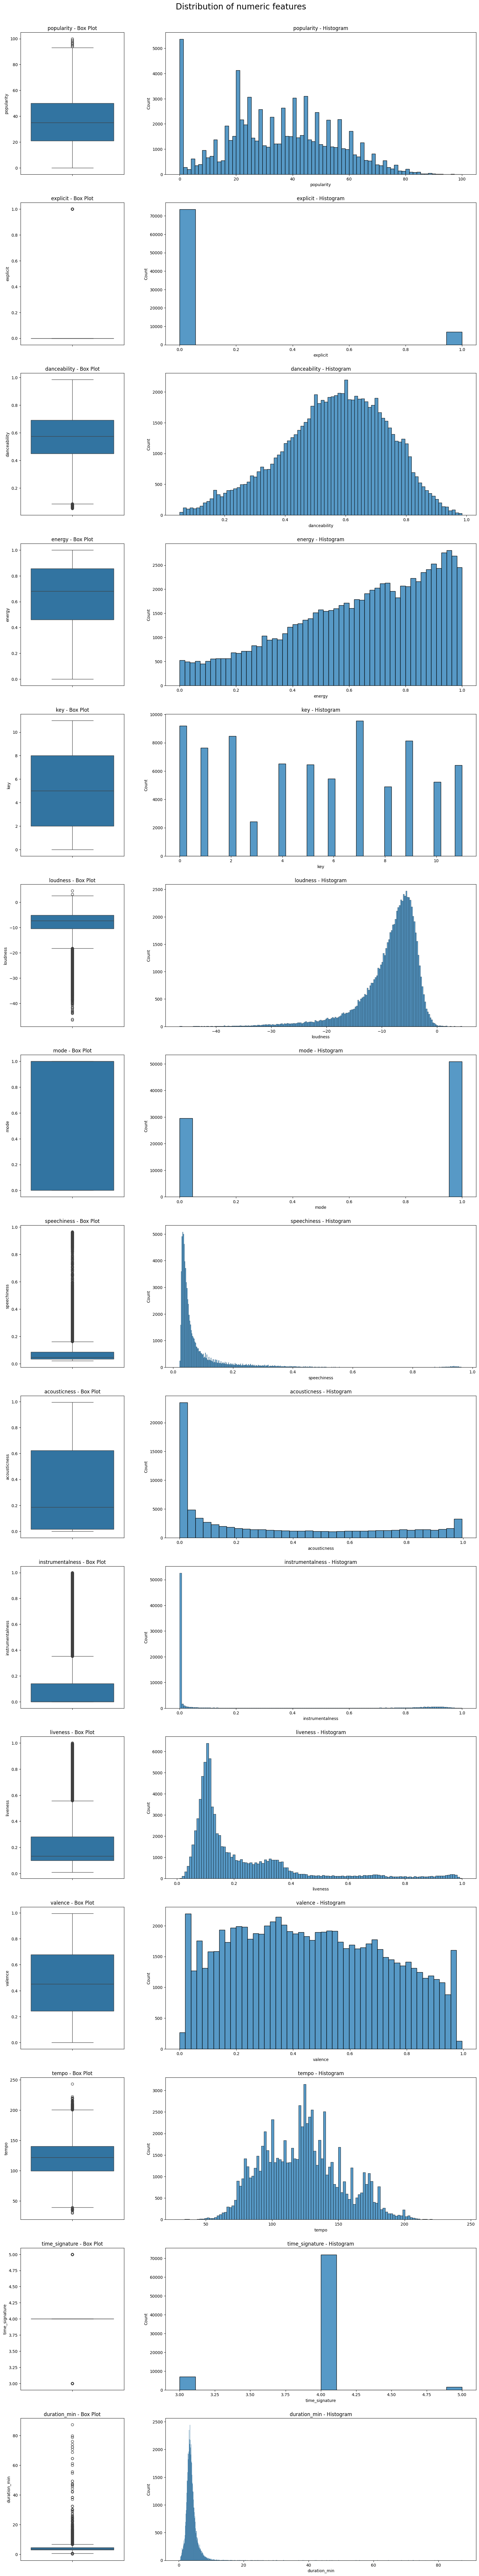

In [63]:
fig, axes = plt.subplots(15, 2, figsize = (20, 100), gridspec_kw={'width_ratios': [1, 3]})

for (ax_box, ax_hist), col in zip(axes, num_cols.columns):
    sns.boxplot(num_cols[col], ax=ax_box)
    sns.histplot(num_cols[col], ax=ax_hist, fill=True)
    ax_box.set_title(f"{col} - Box Plot")
    ax_hist.set_title(f"{col} - Histogram")

plt.suptitle('Distribution of numeric features', fontsize=20)
plt.subplots_adjust(top=0.97)
plt.show()

### The analysis of numeric feaures:
1. The distribution of **popularity scores** is right skewed with the largest proportion of songs in the dataset scored between 20 and 50 in popularity;
2. About 88% of all songs are not **explicit**;
3. The distribution of **danceability score** is a bit left skewed with the largest proportion of songs scored between 0.45 and 0.7 in danceability;
4. The distribution of **energy** is left skewed with most of the songs scored between 0.45 and 0.85 in energy;
5. The distribution of **loudness** is extremely left skewed with most songs scored between -10 and -5 in loudness;
6. About 65% of songs are in major **mode**;
7. The distribution of **speechiness** is extremely right skewed with a large number of outliers. Most songs scored between 0.04 and 0.1 in speechiness;
8. The distribution of **acousticness** is right skewed with a prevalence of 0 as the most common value in the dataset;
9. The distribution of **instrumentalness** is extremely right skewed with a large number of outliers. Most songs scored between 0 and 0.1 in instrumentalness;
10. The distribution of **liveness** is extremely right skewed with most songs score between 0.15 and 0.3;
11. The **valence** distribution is not normal with most songs scored between 0.25 and 0.65;
12. The **tempo** distribution is not normal with most songs scored between 100 and 145 in tempo with the average of 122.5 BPM;
13. About 90% of songs have 4/4 **time signature**;
14. The distribution of **duration min** is right skewed with a large number of outliers. Most of the songs last between 2.9 and 4.5 minutes.

### 2.2 Detection of outliers

In [19]:
#The number of tracks longer than 10 minutes
count_rows_gt_10 = len(spotify[spotify['duration_min'] > 10])
print(f"Number of rows with duration_min > 10: {count_rows_gt_10}")

Number of rows with duration_min > 10: 529


Tracks longer than 10 minutes can be considered outliers, which can potentially significantly impact the future analysis, so it's better to drop them.

In [20]:
spotify.drop(spotify[spotify['duration_min'] > 10].index, inplace=True)

In [21]:
print(f"Number of tracks after outlines' deletion: {len(spotify)}")

Number of tracks after outlines' deletion: 79894


### 2.3 Relationship between Variables

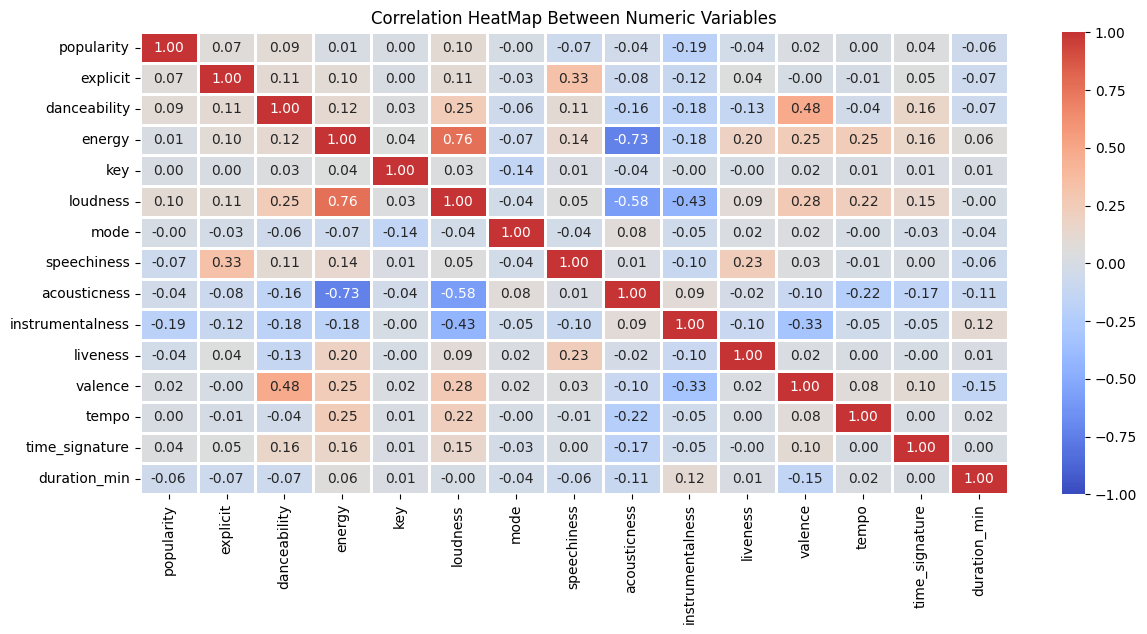

In [67]:
#Check the correlation of numeric variables
num_cols.corr()
plt.figure(figsize=(14,6))
sns.heatmap(num_cols.corr(), annot=True,fmt='.2f', vmin=-1.0, vmax=1.0, center=0.05, cmap='coolwarm', linewidths=1, linecolor='White')
plt.title("Correlation HeatMap Between Numeric Variables")
plt.xticks(rotation=90)
plt.show()

As the heatmap showed, **danceability** has:
- a moderate positive correlation with **valence**;
- a weak positive correlation with **loudness**;
- a weak negative correlation with **instrumentalness**, **acousticness**, and **liveness**.

We may also observe strong negative correlaion between **energy** and **acousticness**, as well as moderate negative correlation between **loudness** and **acousticness** and between **loudness** and **instrumentalness** which might be an issue for linear regression models.

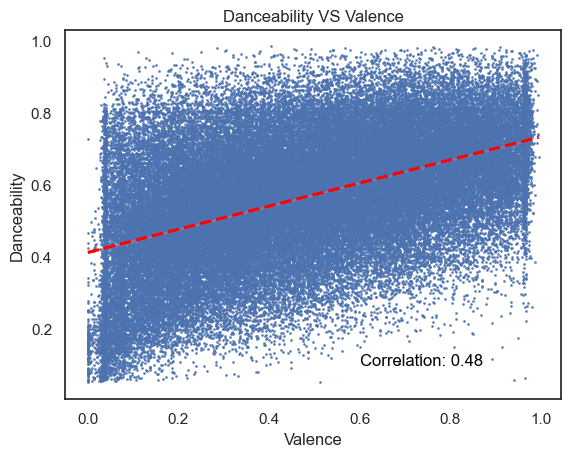

In [68]:
#Danceability and Valence
sns.set(style='white')
sns.regplot(x=spotify['valence'], y=spotify['danceability'], scatter_kws={'s': 1}, line_kws={'color': 'red', 'linestyle': '--'})
correlation_coefficient = 0.48
plt.text(0.6, 0.1, f'Correlation: {correlation_coefficient:.2f}', fontsize=12, color='black')
plt.xlabel('Valence')
plt.ylabel('Danceability')
plt.title('Danceability VS Valence')
plt.show()

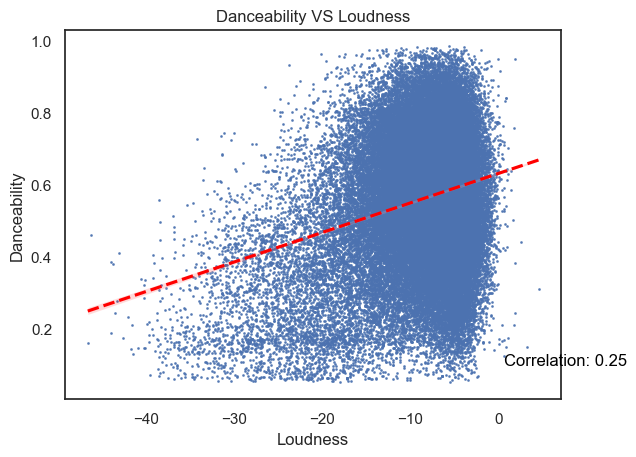

In [69]:
#Dancebility and Loudness
sns.set(style='white')
sns.regplot(x=spotify['loudness'], y=spotify['danceability'], scatter_kws={'s': 1}, line_kws={'color': 'red', 'linestyle': '--'})
correlation_coefficient = 0.25
plt.text(0.6, 0.1, f'Correlation: {correlation_coefficient:.2f}', fontsize=12, color='black')
plt.xlabel('Loudness')
plt.ylabel('Danceability')
plt.title('Danceability VS Loudness')
plt.show()

The regresssion plots confirm findings from the heatmap.

### 2.4 Analysis of categorical variables

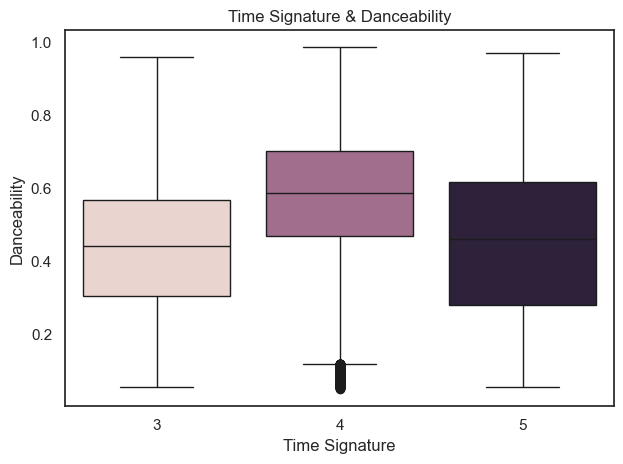

In [70]:
#Time Signature & Danceability
sns.boxplot(x='time_signature', y='danceability', data=spotify, hue='time_signature', legend=False)
plt.xlabel('Time Signature')
plt.ylabel('Danceability')
plt.title('Time Signature & Danceability')

plt.tight_layout()
plt.show()

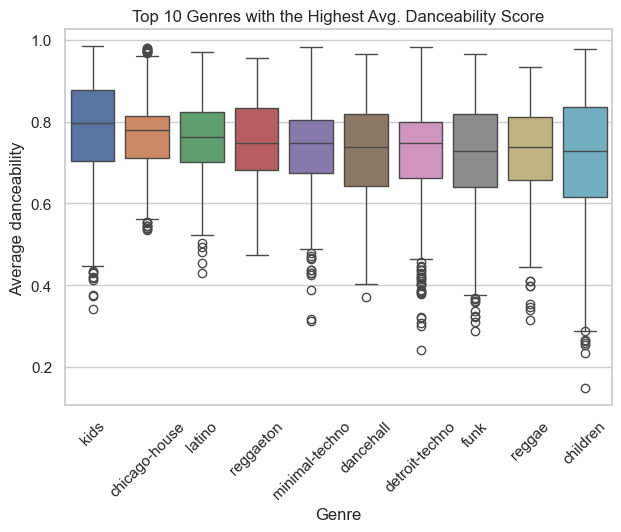

In [71]:
#Genres with the Highest Danceability Score
average_danceability_by_genre = spotify.groupby('track_genre')['danceability'].mean()
dance_genres = average_danceability_by_genre.nlargest(10).index
dance_genres_data = spotify[spotify['track_genre'].isin(dance_genres)]
dance_genres_data['track_genre'] = pd.Categorical(dance_genres_data['track_genre'], categories=dance_genres, ordered=True)
sns.set(style='whitegrid')
sns.boxplot(data=dance_genres_data, x='track_genre', y='danceability', hue='track_genre')
plt.title("Top 10 Genres with the Highest Avg. Danceability Score")
plt.xlabel("Genre")
plt.ylabel("Average danceability")

plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

Based on the initial analysis, we can conclude a track gets a higher danceability score if:
-  it has a higher **valence** - it's more positive;
-  it's **louder**;
-  it has **4/4** time signature;
-  it has one of the following **genres**: kids, chicago-house, latino, reggaeton, minimal-techno, dancehall, detroit-techno, funk, reggae or children.

## 3. Model Building

### 3.1 Data Preprocessing

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

First of all, we need to drop the unnecessary colums: **track_id, artists, album_name and track_name** wouldn't be very helpful in our analysis.

In [23]:
X = spotify.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'danceability'])
X['mode'] = X['mode'].astype('category')
X['key'] = X['key'].astype('category')
X['time_signature'] = X['time_signature'].astype('category')
X['explicit'] = X['explicit'].astype('category')
X['track_genre'] = X['track_genre'].astype('category')
y = spotify['danceability']

numeric_features = X.select_dtypes(include=['int', 'float']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

### 3.2 Elastic Net Model

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=818)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

en_cv = ElasticNetCV(l1_ratio=np.arange(0, 1.1, 0.1),
                     alphas = np.arange(0, 1.1, 0.1),
                     random_state=818,
                     n_jobs = -1)

model = make_pipeline(preprocessor, en_cv)
model.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['popularity', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['explicit', 'key', 'mode', 'time_signature', 'track_genre'], dtype='object'))])),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                              l1_ratio=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                              n_jobs=-1, random_state=818))])

In [25]:
best_alpha = en_cv.alpha_
best_l1_ratio = en_cv.l1_ratio_

print(f'The tuned hyperparameters for ElasticNet are: alpha - {best_alpha: .4f}, l1_ratio - {best_l1_ratio: .4f}')

The tuned hyperparameters for ElasticNet are: alpha -  0.0000, l1_ratio -  0.3000


Let's create a function to fit and evaluate a model after hyperparameters' tuning:

In [26]:
def fit_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred)
    print(f'Evaluation metrics on the train set: r2 - {r2_train: .4f}, mse - {mse_train: .4f}') 
    print(f'Evaluation metrics on the test set: r2 - {r2_test: .4f}, mse - {mse_test: .4f}')


In [27]:
en = make_pipeline(preprocessor, ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio))
fit_evaluate(en, X_train, y_train, X_test, y_test)

Evaluation metrics on the train set: r2 -  0.5638, mse -  0.0134
Evaluation metrics on the test set: r2 -  0.5581, mse -  0.0134


### 3.3 Decision Tree Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=819)

numeric_features = X.select_dtypes(include=['int', 'float']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
    ],
    remainder='passthrough'
)

param_grid = {
    'decisiontreeregressor__max_depth': np.arange(1, 10, 1),
    'decisiontreeregressor__min_samples_split': np.arange(20, 80, 10),
    'decisiontreeregressor__min_samples_leaf': np.arange(1, 10, 1)
}

tree = make_pipeline(preprocessor, DecisionTreeRegressor())

gridsearch = GridSearchCV(tree, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['explicit', 'key', 'mode', 'time_signature', 'track_genre'], dtype='object'))])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'decisiontreeregressor__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'decisiontreeregressor__min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'decisiontreeregressor__min_samples_split': array([20, 30, 40, 50, 60, 70])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_params = gridsearch.best_params_
print(f'The tuned hyperparameters for DecisionTreeRegressor are {best_params}')

tree_model = gridsearch.best_estimator_

The tuned hyperparameters for DecisionTreeRegressor are {'decisiontreeregressor__max_depth': 9, 'decisiontreeregressor__min_samples_leaf': 9, 'decisiontreeregressor__min_samples_split': 70}


In [ ]:
fit_evaluate(tree_model, X_train, y_train, X_test, y_test)

Evaluation metrics on the train set: r2 -  0.5297, mse -  0.0144
Evaluation metrics on the test set: r2 -  0.4718, mse -  0.0160


In [ ]:
decisiontree = make_pipeline(preprocessor, DecisionTreeRegressor(ccp_alpha=0.00001))
fit_evaluate(decisiontree, X_train, y_train, X_test, y_test)

Evaluation metrics on the train set: r2 -  0.5316, mse -  0.0144
Evaluation metrics on the test set: r2 -  0.4839, mse -  0.0156


### 3.4 Random Forest Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=822)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
    ],
    remainder='passthrough'
)

forest_model = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100,
    max_depth=11,  
    min_samples_leaf=10, 
    min_samples_split=10,  
    max_features='sqrt'))

fit_evaluate(forest_model, X_train, y_train, X_test, y_test)

Evaluation metrics on the train set: r2 -  0.6018, mse -  0.0122
Evaluation metrics on the test set: r2 -  0.5604, mse -  0.0135


### 3.5 LightGBM

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=824)

cat_features = ['explicit', 'key', 'mode', 'time_signature', 'track_genre']

params = {
    'num_leaves': 50,
    'learning_rate': 0.05,
    'max_depth': 40,
    'min_child_samples': 20,
    'reg_alpha': 0.01,
    'reg_lambda': 0.01,
    'feature_fraction': 0.8
}


gbm = lgb.LGBMRegressor(**params, categorical_feature = cat_features, verbose = -1)
fit_evaluate(gbm, X_train, y_train, X_test, y_test)

Evaluation metrics on the train set: r2 -  0.7158, mse -  0.0087
Evaluation metrics on the test set: r2 -  0.6924, mse -  0.0094


## 4. Choosing the best model

### 4.1 Comparison of models

Now, we can compare the metrics from each of the developed models side by side to determine the best one.

In [ ]:
models = {
    'ElasticNet': {
        'R-squared train': 0.5638,
        'R-squared test': 0.5581,
        'MSE train': 0.0134,
        'MSE test': 0.0134
    },
    'DecisionTreeRegressor': {
        'R-squared train': 0.5297,
        'R-squared test': 0.4718,
        'MSE train': 0.0144,
        'MSE test': 0.0160
    },
    'RandomForestRegressor': {
        'R-squared train': 0.6035,
        'R-squared test': 0.5609,
        'MSE train': 0.0121,
        'MSE test': 0.0135
    },
    'LGBMRegressor': {
        'R-squared train': 0.7158,
        'R-squared test': 0.6924,
        'MSE train': 0.0087,
        'MSE test': 0.0094
    }
}

In [ ]:
models = pd.DataFrame(models)
models

,ElasticNet,DecisionTreeRegressor,RandomForestRegressor,LGBMRegressor
R-squared train,0.5638,0.5297,0.6035,0.7158
R-squared test,0.5581,0.4718,0.5609,0.6924
MSE train,0.0134,0.0144,0.0121,0.0087
MSE test,0.0134,0.0160,0.0135,0.0094


In [ ]:
models_dict = {'ElasticNet': en, 'DecisionTreeRegressor': tree_model, 'RandomForestRegressor': forest_model, 'LGBMRegressor': gbm}

Let's create a function to cross-validate the models' performance.

In [ ]:
def cross_val_boxplot(models_dict): 
    results = []

    for model in models_dict.values():
        kf = KFold(n_splits=5, shuffle=True, random_state=818)
        cv_results = -cross_val_score(model, X_train, y_train, cv=kf, scoring = 'neg_mean_squared_error')
        results.append(cv_results)

    fig = plt.figure(figsize=(10,8))
    plt.boxplot(results, labels = models_dict.keys())
    plt.ylabel('Mean Squared Error')
    plt.title('Cross Validation of Models')
    plt.show()

    for model_name, model in models_dict.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse_test = mean_squared_error(y_test, y_pred)
        print(f'{model_name} MSE test score: {mse_test: .4f}')
        

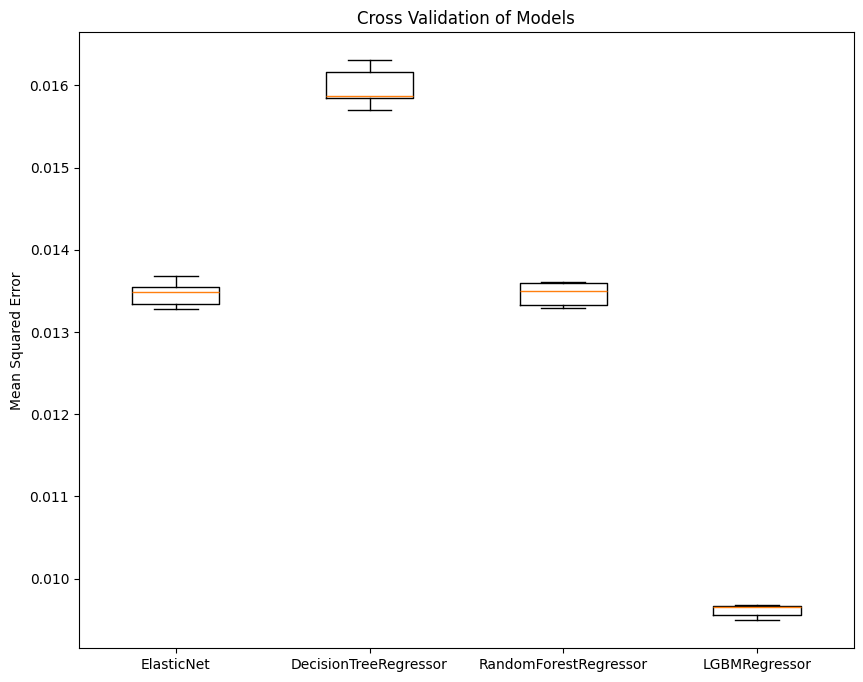

ElasticNet MSE test score:  0.0133
DecisionTreeRegressor MSE test score:  0.0158
RandomForestRegressor MSE test score:  0.0132
LGBMRegressor MSE test score:  0.0094


In [ ]:
cross_val_boxplot(models_dict)

### 4.2 Analysis of residuals

 Now we can examine the distribution of the residuals to check if the chosen model is robust. The histogram of residuals displays a symmetric bell-shaped curve, characteristic of a normal distribution. Likewise, the residuals plot depicts a random scattering of points around the horizontal line at y=0, indicating that the residuals are evenly distributed across the range of predicted values. These findings are consistent with the assumptions of the regression model and suggest that the model adequately captures the underlying relationships within the data.

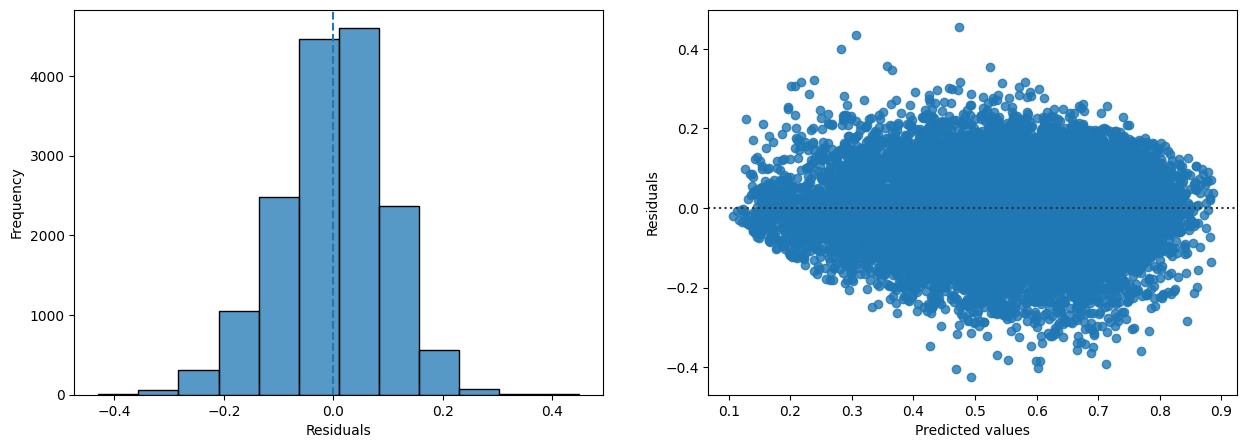

In [ ]:
#Residuals analysis
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
residuals = y_test - y_pred
residuals = pd.DataFrame({'Residuals': residuals})

fig, axs = plt.subplots(1, 2, figsize = (15, 5))
sns.histplot(data = residuals, x='Residuals', bins=12, ax=axs[0])
axs[0].axvline(x=0, linestyle = '--')
axs[0].set_xlabel('Residuals')
axs[0].set_ylabel('Frequency')

sns.residplot(x=y_pred, y=residuals['Residuals'], ax=axs[1])
axs[1].set_xlabel('Predicted values')
axs[1].set_ylabel('Residuals')

plt.show()


## 5. Playlist Curation

### 5.1 Model Analysis

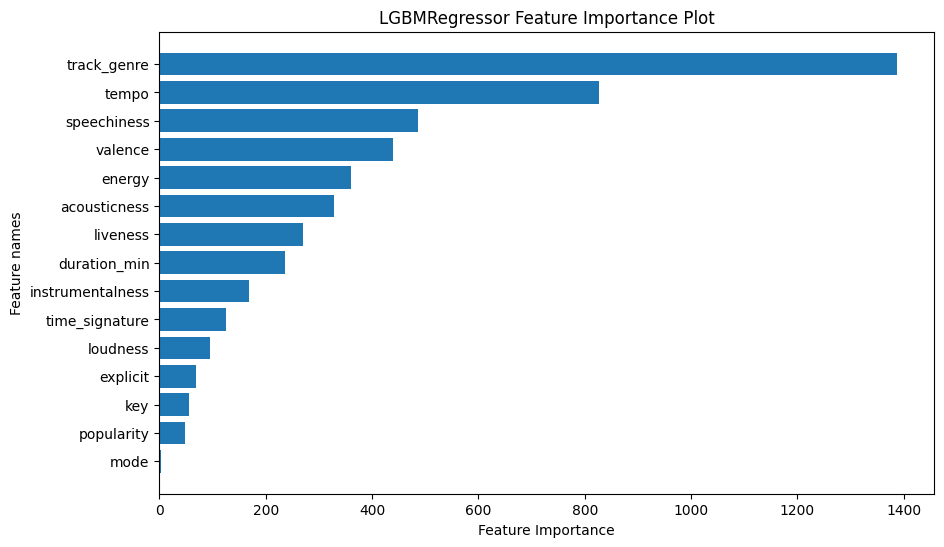

In [23]:
#Check the most important features of the model
feature_importance = gbm.feature_importances_
feature_names = X.columns

sorted_indices = np.argsort(feature_importance)
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature names')
plt.title('LGBMRegressor Feature Importance Plot')
plt.show()

The most important features of our model are **track_genre**, **tempo**, **speechiness**, **valence** and **energy**.

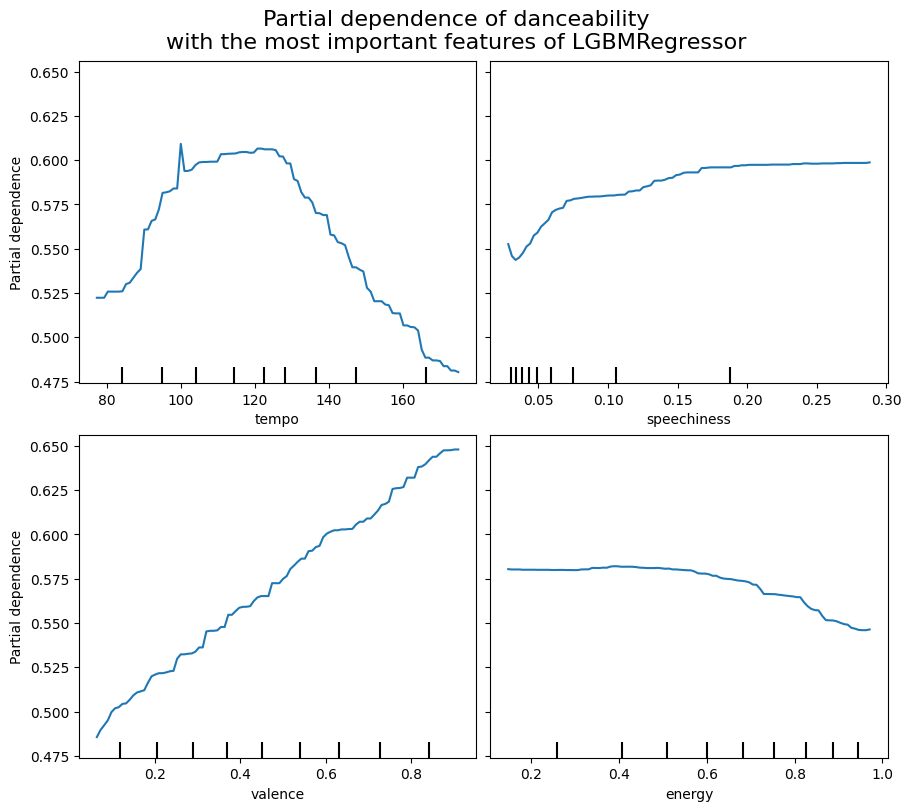

In [28]:
#Partial dependence plots to examine the influence of the most important features on the target variable
from sklearn.inspection import PartialDependenceDisplay

features_info = {
    'features': ['tempo', 'speechiness', 'valence', 'energy'],
    'kind': 'average'
}

_, ax = plt.subplots(ncols=2, nrows=2, figsize=(9, 8), constrained_layout = True)
display = PartialDependenceDisplay.from_estimator(
    gbm,
    X_train,
    **features_info,
    ax=ax
)

_ = display.figure_.suptitle(
    ('Partial dependence of danceability\n'
     'with the most important features of LGBMRegressor'),
     fontsize=16
)

The partial dependence plots suggest the track with the highest dancebaility:
- has a **tempo** from 100 to 130;
- **speechiness** higher than at least 0.07;
- higher **valence**;
- **energy** less than 0.7


### 5.2 Playlist Curation

In [30]:
all_predictions = gbm.predict(X)

predictions_df = pd.DataFrame({'track_name': spotify['track_name'], 'artists': spotify['artists'], 'predicted_danceability': all_predictions, 'actual_danceability': spotify['danceability'], 'genre': spotify['track_genre'], 'valence': spotify['valence'], 'popularity': spotify['popularity'], 'tempo': spotify['tempo'], 'speechiness': spotify['speechiness'], 'energy': spotify['energy']})

The model indicated **track_genre** as the most important feature to predict danceability - it should definitely be taken into account while creating a playlist. To ensure a vibrant party atmosphere, I've meticulously chosen around 30 genres with the highest average danceability scores, omitting some genres that are high in danceability but seem inappropriate for a party, such as **kids**, **children**, **sad** or even **disco** (as this one is truly a bit outdated).

I've also taken into account the model's recommendations regarding **tempo** and **energy** features.

Although the model didn't prioritize **popularity** as a significant factor in danceability prediction, I've opted to include only tracks with a popularity score exceeding 65. This decision is based on the intuition that people are more inclined to dance to familiar tunes.

In [59]:
filtered_predictions = predictions_df[predictions_df['genre'].isin(['chicago-house', 'latino', 'reggaeton', 'minimal-techno', 'dancehall', 'detroit-techno', 'funk', 'reggae', 'deep-house', 'latin', 'house', 'techno', 'dance', 'j-dance', 'party', 'salsa', 'afrobeat', 'electronic', 'electro', 'edm', 'forro', 'breakbeat', 'r-n-b', 'trip-hop', 'k-pop', 'soul', 'progressive-house', 'synth-pop', 'club', 'indie-pop', 'indie', 'pop'])]
filtered_predictions_sorted = filtered_predictions.sort_values(by='predicted_danceability', ascending=False)
top_50_songs_new = filtered_predictions_sorted[(filtered_predictions_sorted['tempo'] >= 100) & (filtered_predictions_sorted['tempo'] <= 130) & (filtered_predictions_sorted['valence'] > filtered_predictions_sorted['valence'].mean() * 1.5) & (filtered_predictions_sorted['energy'] <= 0.8) & (filtered_predictions_sorted['popularity'] > 60)].head(50)
top_50_songs_new

,track_name,artists,predicted_danceability,actual_danceability,genre,valence,popularity,tempo,speechiness,energy
23740,Before I Lose My Mind,Claptone;Say Yes Dog,0.846707,0.872,deep-house,0.958,62,120.005,0.0660,0.510
20969,Iskaba,Wande Coal;DJ Tunez,0.842275,0.799,dancehall,0.940,63,125.041,0.0710,0.393
68315,Si Veo a Tu Mamá,Bad Bunny,0.831604,0.900,latino,0.824,82,129.928,0.0646,0.603
37479,Psycho Killer - 2005 Remaster,Talking Heads,0.830939,0.721,funk,0.942,78,123.118,0.0613,0.521
20972,Kontrol,Maleek Berry,0.826845,0.868,dancehall,0.886,62,113.993,0.0512,0.521
21082,Koroba,Tiwa Savage,0.825856,0.850,dancehall,0.930,61,104.022,0.0611,0.645
53333,Jerusalema (feat. Nomcebo Zikode),Master KG;Nomcebo Zikode,0.824656,0.880,house,0.827,74,124.009,0.0505,0.483
20483,Uptown Funk (feat. Bruno Mars),Mark Ronson;Bruno Mars,0.821570,0.856,dance,0.928,83,114.988,0.0824,0.609
68369,K alegría,DELLAFUENTE;Rvfv,0.816562,0.777,latino,0.880,70,110.020,0.0964,0.787
20477,How Long,Charlie Puth,0.813560,0.845,dance,0.811,73,109.974,0.0778,0.561


In [60]:
top_50_songs_new['genre'].value_counts()

genre
dancehall     7
dance         7
latino        5
indie-pop     5
deep-house    4
k-pop         4
edm           4
house         3
funk          2
latin         2
pop           2
electro       2
electronic    1
reggaeton     1
techno        1
Name: count, dtype: int64

It's not surprising our playlist mostly consists of **dancehall**, **dance** and **latino** songs - genres with very high average danceability score, as shown in the initial analysis. The playlist also contains other genres with high danceability, such as **funk**, **house**, and **reggaeton**.

We've included tracks by **BTS**, one of the most popular artists of our time, which are sure to be a hit with our audience. Additionally, our lineup includes tracks by esteemed artists such as **Doja Cat, Charlie Puth, The Chainsmokers, One Direction and Jennifer Lopez**. 

Our playlist offers a vibrant mix of songs in English, Spanish (Latino), and Korean (K-pop), guaranteeing our guests an engaging and dynamic experience. Moreover, the **energy** and **tempo** of  all the chosen tracks matches the model's recommendations.

These chosen tracks are not only highly popular but also boast impressive predicted and actual danceability scores, setting the stage for an unforgettable dance party. 

**Time to have fun!** 🎉